In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv('Data.csv')

In [81]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [82]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

In [67]:
X.head()

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN


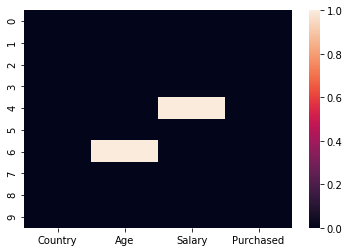

In [35]:
sns.heatmap(data.isnull())

In [38]:
data[data['Salary'].isnull()]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes


In [41]:
data.loc[data['Salary'].isnull()]['Salary']

4   NaN
Name: Salary, dtype: float64

In [43]:
meanSalary = data['Salary'].mean()
meanSalary

63777.77777777778

In [50]:
data.loc[data['Salary'].isnull(),'Salary'] = meanSalary

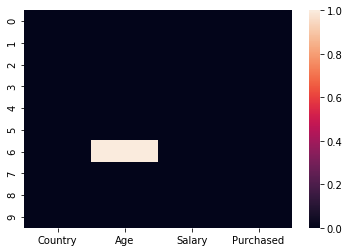

In [52]:
sns.heatmap(data.isnull())

In [61]:
meanAge = round(data['Age'].mean())
meanAge

39

In [62]:
data.loc[data['Age'].isnull(),'Age'] = meanAge

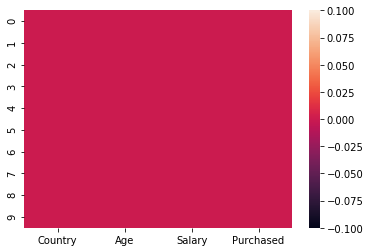

In [63]:
sns.heatmap(data.isnull())

In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [84]:
X[['Salary','Age']] = imputer.fit_transform(X[['Salary','Age']])

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')

In [86]:
X = np.array(ct.fit_transform(X))

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 101)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [97]:
X_train[:,3:] = sc.fit_transform(X_train[:,3:])

In [98]:
X_test[:,3:] = sc.transform(X_test[:,3:])

NameError: name 'X_train' is not defined